# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser

import pandas as pd, numpy as np
from datetime import datetime

In [2]:
#On importe les données dans un dataframe

df_import = pd.read_excel("c:/source/histo.xlsx")

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [4]:
#suporession colonnes inutiles
suppr_colonnes = ['adresse_numero','adresse_nom_voie','nom_commune','type_local']
df_import=df_import.drop(suppr_colonnes, axis=1)

#suppression des lignes vides
df_import.dropna(how='all', inplace=True)

#vérification des types de données
df_import['valeur_fonciere'] = np.floor(pd.to_numeric(df_import['valeur_fonciere'], errors='coerce')).astype('Int64')
df_import['code_postal'] = np.floor(pd.to_numeric(df_import['code_postal'], errors='coerce')).astype('Int64')
df_import['code_type_local'] = np.floor(pd.to_numeric(df_import['code_type_local'], errors='coerce')).astype('Int64')
df_import['surface_reelle'] = np.floor(pd.to_numeric(df_import['surface_reelle'], errors='coerce')).astype('Int64')

liste_vide = "Les cellules vides sont : "

for j in list(df_import.columns.values):
    i=0
    while i<len(df_import[j]):
        if pd.isna(df_import.loc[i,j])==True :
           liste_vide = liste_vide + "\n" + str(i+2) + " sur la colonne : " + j
            
        i=i+1
print(liste_vide)
df_import.dropna(inplace=True)
print("les lignes sont supprimmées du traitement")

Les cellules vides sont : 
les lignes sont supprimmées du traitement


In [5]:
#On vérifie que le type des données attribué par pandas est cohérent
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date_mutation    26196 non-null  datetime64[ns]
 1   valeur_fonciere  26196 non-null  Int64         
 2   code_postal      26196 non-null  Int64         
 3   code_type_local  26196 non-null  Int64         
 4   surface_reelle   26196 non-null  Int64         
dtypes: Int64(4), datetime64[ns](1)
memory usage: 1.1 MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [6]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :',df_import['code_type_local'].nunique())


la liste des différents types de biens immobiliers que nous avons dans les données est : 2


In [7]:
list_str = list(df_import['code_type_local'].unique())
print("On observe qu'il y a",df_import['code_type_local'].nunique()," types de biens, \net que leurs codes types sont :",list_str)

On observe qu'il y a 2  types de biens, 
et que leurs codes types sont : [2, 4]


### 3. Nombre de transactions

In [8]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est :', df_import['date_mutation'].shape[0])

nb_appart = (df_import[df_import['code_type_local']==2]['code_type_local'].count())
print('le nombre de transactions pour les appartements dans les données est :',nb_appart)

nb_locaux = (df_import[df_import['code_type_local']==4]['code_type_local'].count())
print('le nombre de transactions pour les locaux commerciaux dans les données est :',nb_locaux)

le nombre de transactions dans les données est : 26196
le nombre de transactions pour les appartements dans les données est : 24353
le nombre de transactions pour les locaux commerciaux dans les données est : 1843


### 4. interval de l'historique des données

In [9]:
#On vérifie également la plage de l'historique disponible

df_import.sort_values(by='date_mutation',ascending = False, inplace= True)

debut=datetime.date((df_import.iloc[-1,0]))
fin=datetime.date(df_import.iloc[0,0])

print('la première date de transaction dans les données est le :',debut)
print('la dernière date de transaction dans les données est le :',fin)

df_import.sort_index(ascending = True, inplace= True)

la première date de transaction dans les données est le : 2017-01-02
la dernière date de transaction dans les données est le : 2021-12-31


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [10]:
df_import.head(40)

,date_mutation,valeur_fonciere,code_postal,code_type_local,surface_reelle
0,2017-01-03,550559,75003,2,50
1,2017-01-12,1576492,75008,2,163
2,2017-01-10,657757,75008,2,66
3,2017-01-10,250086,75003,2,22
4,2017-01-13,176266,75001,2,15
5,2017-01-06,384552,75008,2,39
6,2017-01-05,754263,75008,2,75
7,2017-01-12,1166410,75008,2,117
8,2017-01-16,360917,75003,2,33
9,2017-01-25,425134,75003,2,38


In [11]:
# Calcul de la colonne et passage en integer
df_import['prix_m2'] =(df_import['valeur_fonciere'] / df_import['surface_reelle']).astype('Int64')

#calcul de l'année
df_import['annee']= (df_import['date_mutation']).dt.year
df_import.head(5)

,date_mutation,valeur_fonciere,code_postal,code_type_local,surface_reelle,prix_m2,annee
0,2017-01-03,550559,75003,2,50,11011,2017
1,2017-01-12,1576492,75008,2,163,9671,2017
2,2017-01-10,657757,75008,2,66,9966,2017
3,2017-01-10,250086,75003,2,22,11367,2017
4,2017-01-13,176266,75001,2,15,11751,2017


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [12]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_appart = df_import[df_import['code_type_local']==2]

#suppression des colonnes pas nécessaires
suppr_colonnes = ['date_mutation','code_postal','code_type_local']
df_appart=df_appart.drop(suppr_colonnes, axis=1)
df_appart.head(5)

,valeur_fonciere,surface_reelle,prix_m2,annee
0,550559,50,11011,2017
1,1576492,163,9671,2017
2,657757,66,9966,2017
3,250086,22,11367,2017
4,176266,15,11751,2017


In [13]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

df_moy=df_appart.groupby("annee").sum()

#calcul du prix au m²
df_moy['prix_m2'] = df_moy['valeur_fonciere']/df_moy['surface_reelle']

#passage du prix en nombre entier
df_moy['prix_m2'] = np.floor(pd.to_numeric(df_moy['prix_m2'], errors='coerce')).astype('Int64')
df_moy.head(10)

,valeur_fonciere,surface_reelle,prix_m2
annee,,,
2017,2227974056,232332,9589
2018,2274328519,224723,10120
2019,2425697129,227692,10653
2020,1908253623,177051,10777
2021,2153012342,204051,10551


On constate sur la moyenne des prix de vente des appartements à Paris que les prix ont grimpé jusqu'en 2020 puis ont baissé sur 2021
Nous allons créer un graphique pour mieux le visualiser.

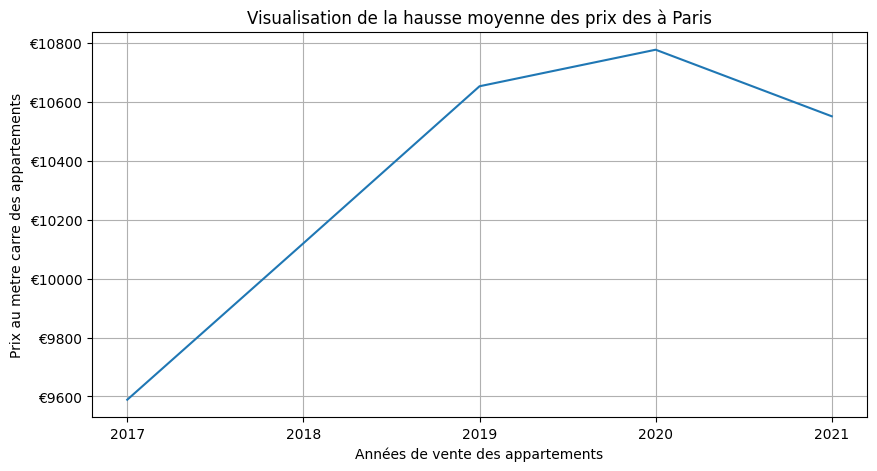

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,5))

y=df_moy['prix_m2']
plt.plot(['2017','2018','2019','2020','2021'],y)
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')

formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [15]:
#Liste des codes postaux dans nos données.
print('nombre de valeur uniques est :',len(df_import['code_postal'].unique()))
liste_cp = (df_import['code_postal'].unique()).tolist()
liste_cp=sorted(liste_cp)
print('la liste des codes postaux est :',liste_cp)

nombre de valeur uniques est : 20
la liste des codes postaux est : [75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009, 75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018, 75019, 75020]


In [16]:
df_appart2 = df_import[df_import['code_type_local']==2]
suppr_colonnes = ['date_mutation','code_type_local']
df_appart2=df_appart2.drop(suppr_colonnes, axis=1)
df_appart2.head(5)

,valeur_fonciere,code_postal,surface_reelle,prix_m2,annee
0,550559,75003,50,11011,2017
1,1576492,75008,163,9671,2017
2,657757,75008,66,9966,2017
3,250086,75003,22,11367,2017
4,176266,75001,15,11751,2017


In [17]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement

df_75001= df_appart2[df_appart2['code_postal']==75001]
df_75001=df_75001.drop(['code_postal'], axis=1)
df_moy_arr= df_75001.groupby(['annee']).sum()
df_moy_arr['prix_m2'] = df_moy_arr['valeur_fonciere']/df_moy_arr['surface_reelle']

df_moy_arr['prix_m2'] = np.floor(pd.to_numeric(df_moy_arr['prix_m2'], errors='coerce')).astype('Int64')
df_moy_arr.head(10)

,valeur_fonciere,surface_reelle,prix_m2
annee,,,
2017,46144100,3936,11723
2018,56976203,4509,12636
2019,41369119,3122,13250
2020,42084303,3141,13398
2021,40277199,3010,13381


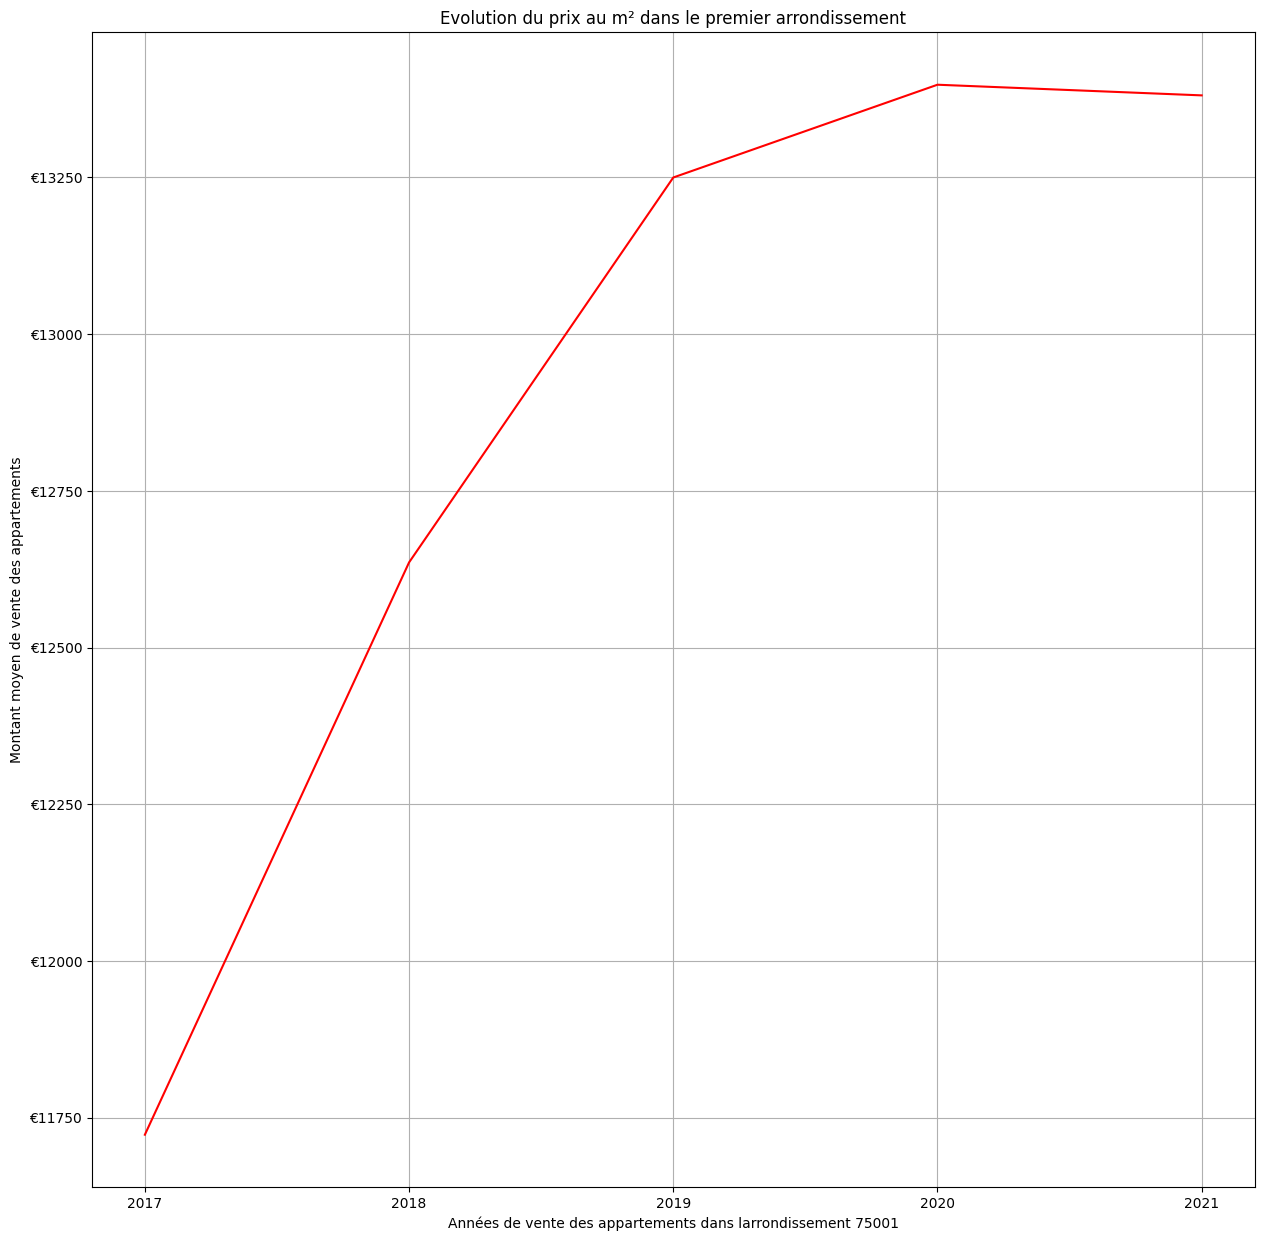

In [18]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
y=df_moy_arr['prix_m2']
plt.plot(['2017','2018','2019','2020','2021'],y,color='red')
plt.xlabel('Années de vente des appartements dans larrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

In [19]:
df_appart2.head(100)

,valeur_fonciere,code_postal,surface_reelle,prix_m2,annee
0,550559,75003,50,11011,2017
1,1576492,75008,163,9671,2017
2,657757,75008,66,9966,2017
3,250086,75003,22,11367,2017
4,176266,75001,15,11751,2017
...,...,...,...,...,...
99,168184,75003,15,11212,2017
100,932701,75001,82,11374,2017
101,939102,75008,96,9782,2017
102,514961,75003,46,11194,2017


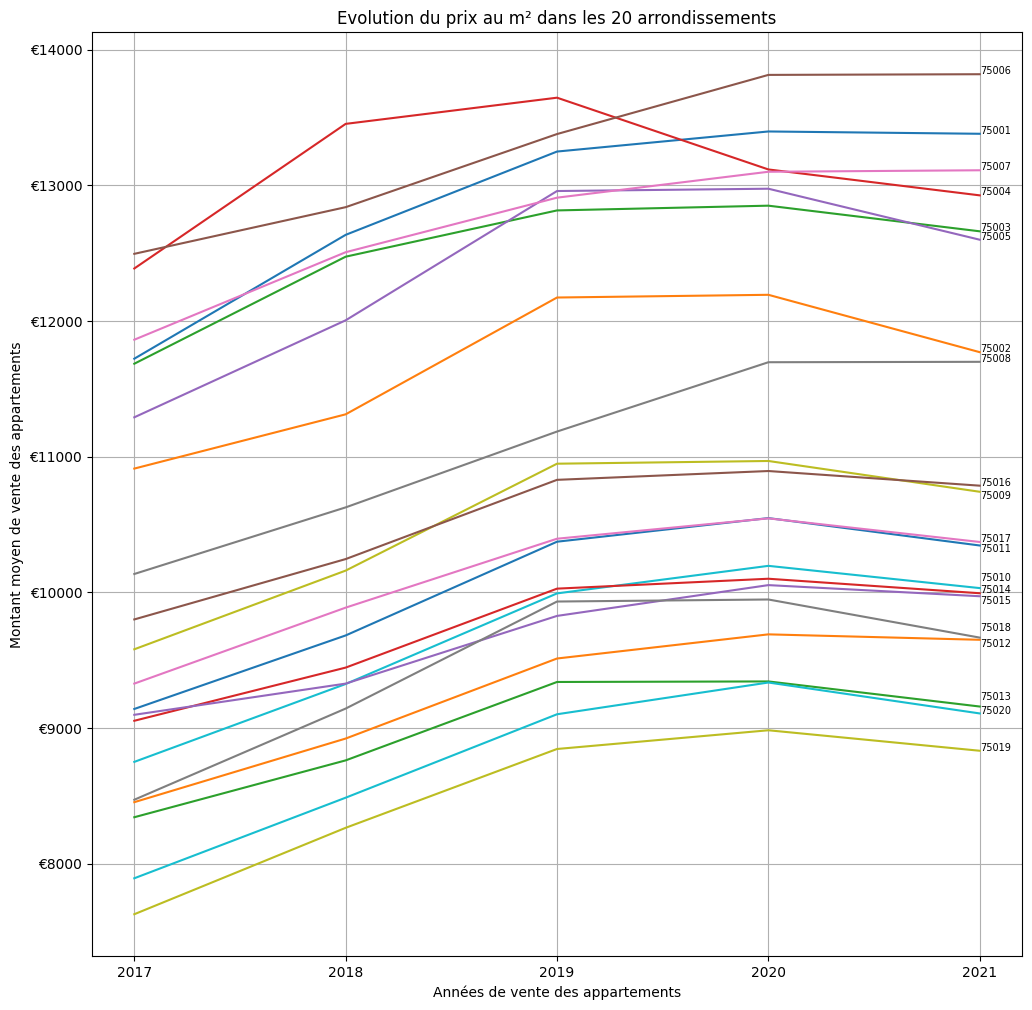

In [20]:
#création d'une liste avec les CP
unique_cp = list(df_appart2['code_postal'].unique())
#unique_cp = [75001,75002]
unique_cp.sort()

plt.figure(figsize=(12,12))
interval_historique=['2017','2018','2019','2020','2021']
couleur = [1,2,3,4,5,6]      

for i in unique_cp :
    #définition des variables
    var_name = f'df_moy_arr{i}'
    
    #traitements
    df_75001= df_appart2[df_appart2['code_postal']==i]
    var_name= df_75001.groupby(['annee']).sum()
    
    var_name['prix_m2']=var_name['valeur_fonciere']/var_name['surface_reelle']
    var_name['prix_m2'] = np.floor(pd.to_numeric(var_name['prix_m2'], errors='coerce')).astype('Int64')

    #graphiques
    var_y=var_name['prix_m2']
    plt.plot(interval_historique,var_y,label=i)
    res=var_name.iloc[4,3]
    if i == 75009 :
        res = res -50
        plt.text(interval_historique[4],res,i, ha='left',fontsize = 7)
    
    elif i == 75011 :
        res = res -50
        plt.text(interval_historique[4],res,i, ha='left',fontsize = 7)

    elif i == 75010 :
        res = res +50
        plt.text(interval_historique[4],res,i, ha='left',fontsize = 7)
        
    elif i == 75015 :
        res = res -60
        plt.text(interval_historique[4],res,i, ha='left',fontsize = 7)

    elif i == 75018 :
        res = res +50
        plt.text(interval_historique[4],res,i, ha='left',fontsize = 7)

    elif i == 75012 :
        res = res -50
        plt.text(interval_historique[4],res,i, ha='left',fontsize = 7)

    elif i == 75013 :
        res = res +50
        plt.text(interval_historique[4],res,i, ha='left',fontsize = 7)
    else:
        plt.text(interval_historique[4],res,i, ha='left',fontsize = 7)

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')

plt.show()

On observe que globalement que ?

### 7. Prix au metre carré par transaction dans un arrondissement

In [21]:
df_import.head(10)

,date_mutation,valeur_fonciere,code_postal,code_type_local,surface_reelle,prix_m2,annee
0,2017-01-03,550559,75003,2,50,11011,2017
1,2017-01-12,1576492,75008,2,163,9671,2017
2,2017-01-10,657757,75008,2,66,9966,2017
3,2017-01-10,250086,75003,2,22,11367,2017
4,2017-01-13,176266,75001,2,15,11751,2017
5,2017-01-06,384552,75008,2,39,9860,2017
6,2017-01-05,754263,75008,2,75,10056,2017
7,2017-01-12,1166410,75008,2,117,9969,2017
8,2017-01-16,360917,75003,2,33,10936,2017
9,2017-01-25,425134,75003,2,38,11187,2017


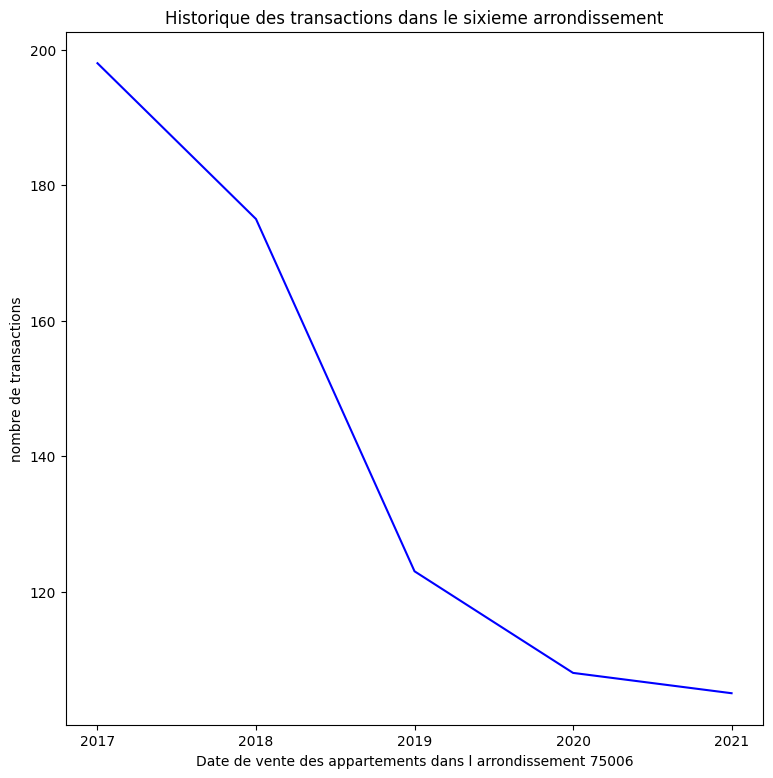

,date_mutation,valeur_fonciere,code_postal,code_type_local,surface_reelle,prix_m2
annee,,,,,,
2017,198,198,198,198,198,198
2018,175,175,175,175,175,175
2019,123,123,123,123,123,123
2020,108,108,108,108,108,108
2021,105,105,105,105,105,105


In [22]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
df_transaction = df_import[df_import['code_type_local']==2]
df_transac6=df_transaction[df_transaction['code_postal']==75006]
df_count=df_transac6.groupby('annee').count()

plt.figure(figsize=(9,9))


y=df_count['date_mutation']

plt.plot(['2017','2018','2019','2020','2021'],y,color='blue')
plt.xlabel('Date de vente des appartements dans l arrondissement 75006')
plt.ylabel('nombre de transactions')
formatter = ticker.FormatStrFormatter('€%d')
#plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()
df_count.head(10)

On constate que le nombre de transaction est en baisse

Affichons l'historique des transactions pour visualiser la dispersion des données :

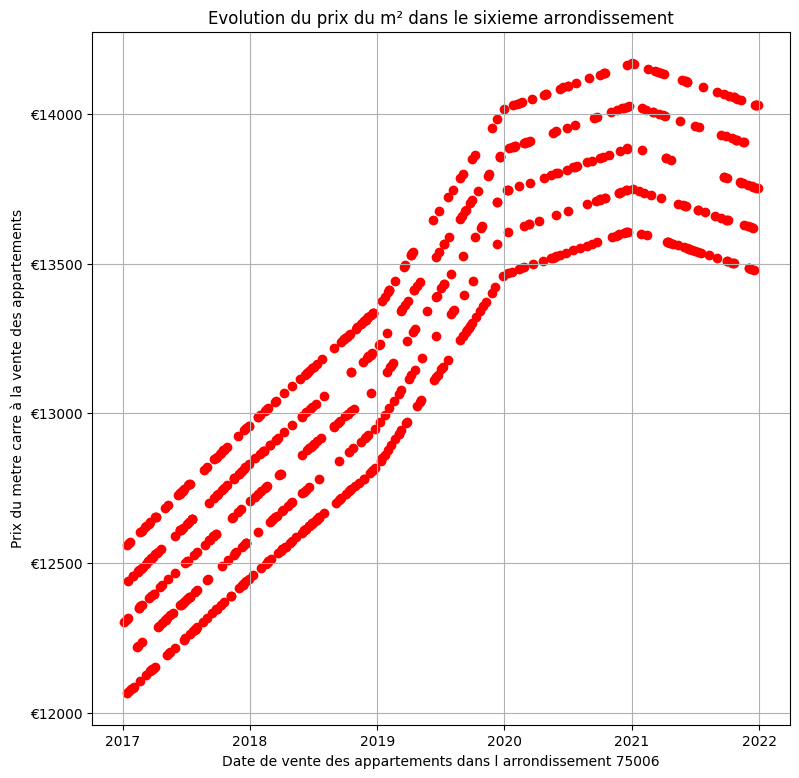

In [23]:
cp=75006
df_transac = df_transaction[df_transaction['code_postal']==cp]
plt.figure(figsize=(9,9))

x=df_transac['date_mutation']
y=df_transac['prix_m2']

plt.scatter(x,y,color='red')
plt.xlabel('Date de vente des appartements dans l arrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Evolution du prix du m² dans le sixieme arrondissement')
plt.show()

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [24]:
df_transac.head(10)

,date_mutation,valeur_fonciere,code_postal,code_type_local,surface_reelle,prix_m2,annee
478,2017-01-10,960131,75006,2,78,12309,2017
482,2017-01-13,820436,75006,2,68,12065,2017
484,2017-01-13,1796111,75006,2,143,12560,2017
488,2017-01-17,248819,75006,2,20,12440,2017
491,2017-01-19,482872,75006,2,40,12071,2017
493,2017-01-05,307594,75006,2,25,12303,2017
495,2017-01-17,307930,75006,2,25,12317,2017
499,2017-01-31,685123,75006,2,55,12456,2017
503,2017-01-26,362384,75006,2,30,12079,2017
504,2017-01-13,172378,75006,2,14,12312,2017


In [25]:
from scipy import stats

data=df_transac['prix_m2']

#test de la normalité. Si normale : Person, sinon Spearman
shapiro_test = stats.shapiro(data)
print("Test de Shapiro-Wilk")
print(f"Resultats: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

if shapiro_test.pvalue <0.05:
    #on considere la distribution comme anormale donc spearman
    corr, p_value = stats.spearmanr(df_transac['annee'], df_transac['prix_m2'])
else:  
    #sinon pearson
    corr, p_value = stats.pearsonr(df_transac['annee'], df_transac['prix_m2'])

print('Le coefficient de corrélation est de',round(corr,4),' avec une pvalue de',p_value,' donc nous pouvons confirmer la corrélation.')


Test de Shapiro-Wilk
Resultats: Statistic=0.9547070264816284, p-value=5.87687992888164e-14
Le coefficient de corrélation est de 0.8979  avec une pvalue de 3.5101379906677244e-254  donc nous pouvons confirmer la corrélation.


### 9. Vérification de la relation entre la valeur fonciere et la surface

In [26]:
data=df_transac['valeur_fonciere']

shapiro_test = stats.shapiro(data)
print("Test de Shapiro-Wilk")
print(f"Resultats: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

if shapiro_test.pvalue <0.05:
    #on considere la distribution comme anormale donc spearman
    corr, p_value = stats.spearmanr(df_transac['valeur_fonciere'], df_transac['surface_reelle'])
else:
    #sinon pearson
    corr, p_value = stats.pearsonr(df_transac['valeur_fonciere'], df_transac['surface_reelle'])
print('Le coefficient de corrélation est de', round(corr,4),' avec une pvalue de ', p_value,'. La relation est donc confirmée.')

Test de Shapiro-Wilk
Resultats: Statistic=0.6168268322944641, p-value=7.0378908239506415e-37
Le coefficient de corrélation est de 0.9978  avec une pvalue de  0.0 . La relation est donc confirmée.


Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [27]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux = df_import[df_import['code_type_local']==4]
suppr_colonnes = ['valeur_fonciere','surface_reelle','code_postal','code_type_local']
df_locaux=df_locaux.drop(suppr_colonnes, axis=1)

df_locaux.head(10)

,date_mutation,prix_m2,annee
18,2017-02-01,12453,2017
29,2017-02-17,12256,2017
34,2017-02-20,12266,2017
91,2017-03-09,12496,2017
109,2017-03-29,12636,2017
135,2017-04-05,12785,2017
137,2017-03-17,10972,2017
141,2017-03-29,12762,2017
142,2017-04-03,10781,2017
156,2017-04-11,12804,2017


In [28]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_locaux_moy = df_locaux.groupby(["annee"])['prix_m2'].mean()
colonne = ['annee','moyenne_prix_m2']
df_locaux_moy = pd.DataFrame(df_locaux_moy)
df_locaux_moy['prix_m2'] = np.floor(pd.to_numeric(df_locaux_moy['prix_m2'], errors='coerce')).astype('Int64')
df_locaux_moy.head(10)

,prix_m2
annee,
2017,10949
2018,11568
2019,11959
2020,11965
2021,12005


In [29]:
#dataframe prix au m² des appartements
df_apparts = df_import[df_import['code_type_local']==2]
suppr_colonnes = ['valeur_fonciere','surface_reelle','code_postal','code_type_local']
df_apparts=df_apparts.drop(suppr_colonnes, axis=1)
df_apparts_moy = df_apparts.groupby(["annee"])['prix_m2'].mean()
colonne = ['annee','moyenne_prix_m2']
df_apparts_moy = pd.DataFrame(df_apparts_moy)
df_apparts_moy['prix_m2'] = np.floor(pd.to_numeric(df_apparts_moy['prix_m2'], errors='coerce')).astype('Int64')
df_apparts_moy.head(10)

,prix_m2
annee,
2017,9492
2018,10030
2019,10562
2020,10674
2021,10455


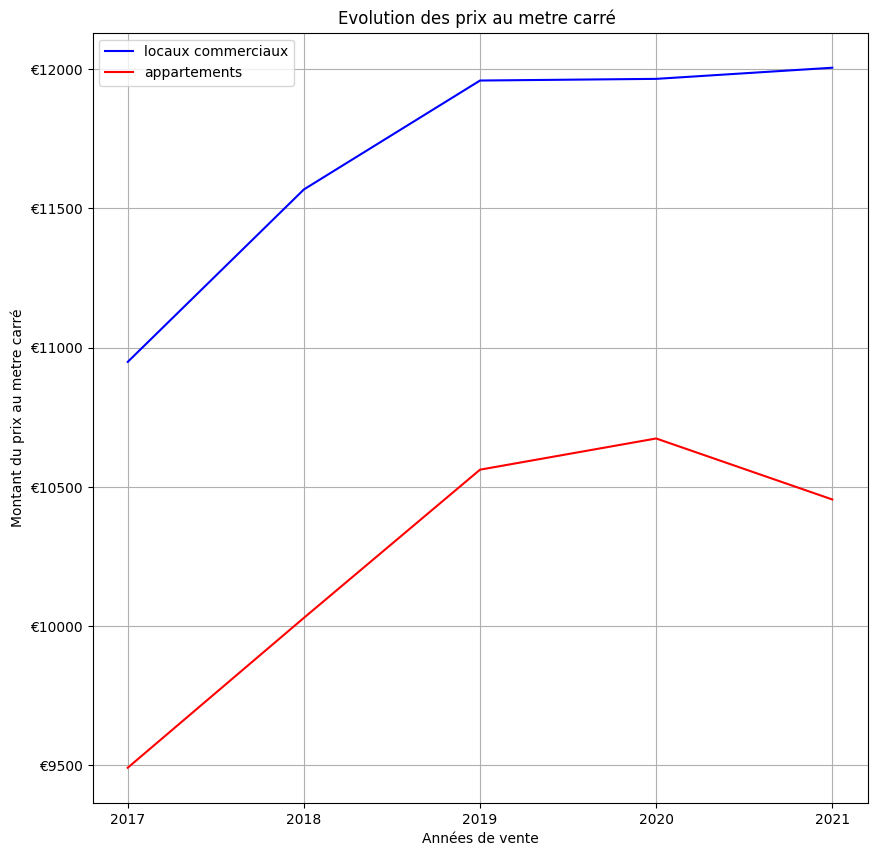

In [30]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
y1 = df_locaux_moy['prix_m2']
y2 = df_apparts_moy['prix_m2']
plt.plot(['2017','2018','2019','2020','2021'],y1,label='locaux commerciaux',color='blue')
plt.plot(['2017','2018','2019','2020','2021'],y2,label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()


In [31]:
df_locaux = df_import[df_import['code_type_local']==4]
df_apparts = df_import[df_import['code_type_local']==2]

prix_moyen_global = int (df_locaux['valeur_fonciere'].sum() / df_locaux['surface_reelle'].sum())
prix_moyen_global_appart = int (df_apparts['valeur_fonciere'].sum() / df_apparts['surface_reelle'].sum())
print('le prix moyen global du m² des locaux commerciaux est : {:,}€'.format(prix_moyen_global).replace(","," "))
print('le prix moyen global du m² des appartements est : {:,}€'.format(prix_moyen_global_appart).replace(","," "))

le prix moyen global du m² des locaux commerciaux est : 11 683€
le prix moyen global du m² des appartements est : 10 310€


In [32]:
#calcul du ttest

from scipy.stats import  ttest_ind

groupe1 = df_locaux_moy['prix_m2']
groupe2 = df_apparts_moy['prix_m2']

#convertir en float
groupe1 = groupe1.astype(float)
groupe2 = groupe2.astype(float)

# Test d'indépendance entre les deux modalités
t_stat, p_value_ttest = ttest_ind( groupe1 , groupe2)
print(f"Statistique de test : {t_stat}")
print(f"p-value : {p_value_ttest}")


Statistique de test : 4.886203040030958
p-value : 0.0012147809932574584


Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [33]:
# Calcul de la colonne
df_import['prix_m2'] =(df_import['valeur_fonciere'] / df_import['surface_reelle']).astype('Int64')

In [34]:
encoded_df = pd.get_dummies(df_import, columns=['code_postal','code_type_local']) 
encoded_df.head(10)

,date_mutation,valeur_fonciere,surface_reelle,prix_m2,annee,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,code_type_local_2,code_type_local_4
0,2017-01-03,550559,50,11011,2017,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2017-01-12,1576492,163,9671,2017,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2017-01-10,657757,66,9966,2017,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2017-01-10,250086,22,11367,2017,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2017-01-13,176266,15,11751,2017,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,2017-01-06,384552,39,9860,2017,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,2017-01-05,754263,75,10056,2017,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,2017-01-12,1166410,117,9969,2017,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,2017-01-16,360917,33,10936,2017,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
9,2017-01-25,425134,38,11187,2017,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [35]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

x=encoded_df.drop(columns=['date_mutation','valeur_fonciere','prix_m2'])
y=encoded_df['prix_m2']
# La valeur y à trouver est la valeur foncière
#x_train valeur d'entrainement X_test = valeurs mises de coté
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

ma_regression = LinearRegression()
ma_regression.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = ma_regression.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)*100
mape= round(mape,2)
print ('Notre algorithme fait donc',mape,'% d\'erreur en moyenne sur la prédiction de la valeur foncière')

Notre algorithme fait donc 2.67 % d'erreur en moyenne sur la prédiction de la valeur foncière


Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Calcul du R2
- Calcul du MSE
- Calcul du RMSE

In [37]:
#somme des carrés des erreurs
ssr = np.sum((y_pred - y_test)**2)

#somme totale des carrés
sst = np.sum((y_test - np.mean(y_test))**2)

r2 = 1 - (ssr/sst)
print(r2)
#R2 proche de 1, le modele peut etre considéré comme satisfaisant

0.9429334070303621


In [38]:
#2nde méthode
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.9429334070303621


In [39]:
mse = np.mean((y_test - y_pred) ** 2)
print("MSE:",mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

MSE: 115215.32111547473
RMSE: 339.43382435384177


# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [40]:
#On importe les données dans un dataframe
df_actuel = pd.read_excel("c:/source/actuel.xlsx")
df_actuel.info()
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 261

Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [41]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
encoded_df_actuel = pd.get_dummies(df_actuel, columns=['code_postal','code_type_local']) 
suppr_col = ['adresse_numero','adresse_nom_voie','code_commune','nom_commune','surface_carrez','type_local','nombre_pieces_principales','longitude','latitude']
encoded_df_actuel=encoded_df_actuel.drop(suppr_col, axis=1)

encoded_df_actuel = encoded_df_actuel.rename(columns={'surface_reelle_bati':'surface_reelle'})
encoded_df_actuel['annee']='2022'

encoded_df_actuel = encoded_df_actuel.reindex(columns=x.columns, fill_value=0)
encoded_df_actuel.head(10)

,surface_reelle,annee,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,code_type_local_2,code_type_local_4
0,25,2022,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,22,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,65,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,22,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
5,35,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
6,24,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,60,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,11,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
9,13,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [42]:
#On effectue la prédiction
#calcul du prix du m² suivant son arrondissement et son type de logement

X_2022 =encoded_df_actuel
resultat_2022 = ma_regression.predict(X_2022)
encoded_df_actuel['prix_m2']=resultat_2022
encoded_df_actuel['prix_m2']=np.floor(pd.to_numeric(encoded_df_actuel['prix_m2'], errors='coerce')).astype('Int64')

encoded_df_actuel.head(100)

,surface_reelle,annee,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,code_type_local_2,code_type_local_4,prix_m2
0,25,2022,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,13812
1,22,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,13422
2,65,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,13418
3,74,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,11933
4,22,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,11937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,2022,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,10978
96,114,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,11346
97,57,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,9395
98,139,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,10525


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [43]:
#calcul de l'estimatif du prix de vente
encoded_df_actuel['prix_global']= encoded_df_actuel['surface_reelle']*encoded_df_actuel['prix_m2']
encoded_df_actuel.head(100)

,surface_reelle,annee,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,code_type_local_2,code_type_local_4,prix_m2,prix_global
0,25,2022,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,13812,345300
1,22,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,13422,295284
2,65,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,13418,872170
3,74,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,11933,883042
4,22,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,11937,262614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,2022,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,10978,581834
96,114,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,11346,1293444
97,57,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,9395,535515
98,139,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,10525,1462975


In [44]:
#Valorisation du portefeuille sur le segment des particuliers

cout_global =encoded_df_actuel.loc[encoded_df_actuel['code_type_local_2'] == True, 'prix_global'].sum()
cout_global_million = round(cout_global/1000000,2)
print('la valorisation du segment particulier est (en millions d\'euros):',cout_global_million)

la valorisation du segment particulier est (en millions d'euros): 68.54


In [45]:
#Valorisation du portefeuille sur le segment corporate

cout_global_pro =encoded_df_actuel.loc[encoded_df_actuel['code_type_local_4'] == True, 'prix_global'].sum()
cout_global_million_pro = round(cout_global_pro/1000000,2)
print('la valorisation du segment corporate est (en millions d\'euros):',cout_global_million_pro)

la valorisation du segment corporate est (en millions d'euros): 96.32


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- les locaux commerciaux ont une valorisation supérieure
- Des éléments pertubateurs (crises, hausse des taux etc...) peuvent à tout moment modifié le marché et donc la prédiction

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

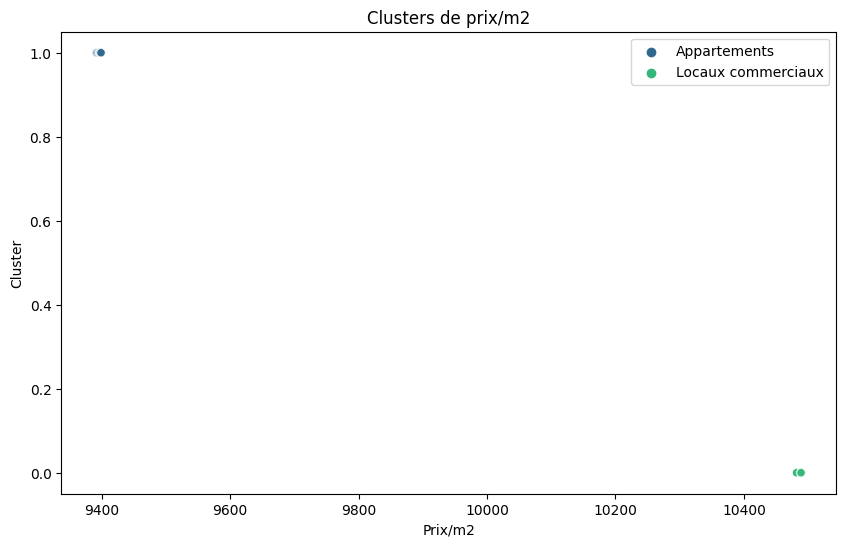

le calcul de l'Adjusted Rand Score est: 1.0


,prix_m2,code_local,cluster,nom,comparaison variables
0,9392,1,1,Appartements,OK
1,9393,1,1,Appartements,OK
2,9395,1,1,Appartements,OK
3,9397,1,1,Appartements,OK
4,9397,1,1,Appartements,OK
5,9397,1,1,Appartements,OK
6,9397,1,1,Appartements,OK
7,9397,1,1,Appartements,OK
8,9398,1,1,Appartements,OK
9,9398,1,1,Appartements,OK


In [46]:
#entrainement sur 2022

from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.simplefilter("ignore") #suppression des codes warning
from sklearn.metrics import adjusted_rand_score

#test du clustering avec les données 2022
df_compare = encoded_df_actuel
df_compare = df_compare[df_compare['code_postal_75019'] == True]
df_compare['code_local']=0
df_compare.loc[df_compare["code_type_local_2"]==True,"code_local"] = 1
suppr_colonnes = ['annee','code_postal_75001','code_postal_75002','code_postal_75003','code_postal_75004','code_postal_75005','code_postal_75006',
                 'code_postal_75007','code_postal_75008','code_postal_75009','code_postal_75010','code_postal_75011','code_postal_75012',
                  'code_postal_75013','code_postal_75014','code_postal_75015','code_postal_75016','code_postal_75017','code_postal_75018',
                  'code_postal_75019','code_postal_75020','code_type_local_2','code_type_local_4','surface_reelle','prix_global']
df_compare=df_compare.drop(suppr_colonnes, axis=1)

df_compare = df_compare.sort_values(by='prix_m2')
df_compare = df_compare.reset_index(drop=True)

X = df_compare[['prix_m2']]

kmeans = KMeans(n_clusters=2, random_state=50)

kmeans.fit(X)

# Ajouter les labels de cluster au DataFrame original
df_compare['cluster'] = kmeans.labels_

new_nom = {0: 'Locaux commerciaux', 1: 'Appartements'}
df_compare['nom'] =df_compare['cluster'].map(new_nom)

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_compare, x='prix_m2', y='cluster', hue='nom', palette='viridis', legend='full')

plt.title('Clusters de prix/m2')
plt.xlabel('Prix/m2')
plt.ylabel('Cluster')
plt.legend(title='')
plt.show()

#verification du calcul par le calcul de l'ajusted rand Score
projection=df_compare['cluster']
reel = df_compare['code_local']
resultat = adjusted_rand_score(reel, projection)
print('le calcul de l\'Adjusted Rand Score est:', resultat)

#verif du calcul - seconde solution
i=0
nb_enregistrements = len(df_compare['prix_m2'])
while i<nb_enregistrements:
    if df_compare.loc[i,'code_local'] == df_compare.loc[i,'cluster']:
        df_compare.loc[i,'comparaison variables']='OK'
    else :
        df_compare.loc[i,'comparaison variables']='erreur'
    i=i+1
df_compare.head(100)

In [47]:
#On importe les données dans un dataframe
df_echant = pd.read_excel("c:/source/echantillon.xlsx")
df_echant.head(5)

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [48]:
df_echant['prix_m2']=df_echant['valeur_fonciere']/df_echant['surface_reelle']
suppr_col = ['valeur_fonciere','nom_commune','surface_reelle']
df_echant=df_echant.drop(suppr_col, axis=1)
df_echant['prix_m2']=np.floor(pd.to_numeric(df_echant['prix_m2'], errors='coerce')).astype('Int64')
df_echant.head(5)

,code_postal,prix_m2
0,75019,9871
1,75019,10045
2,75019,9194
3,75019,9469
4,75019,7463


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

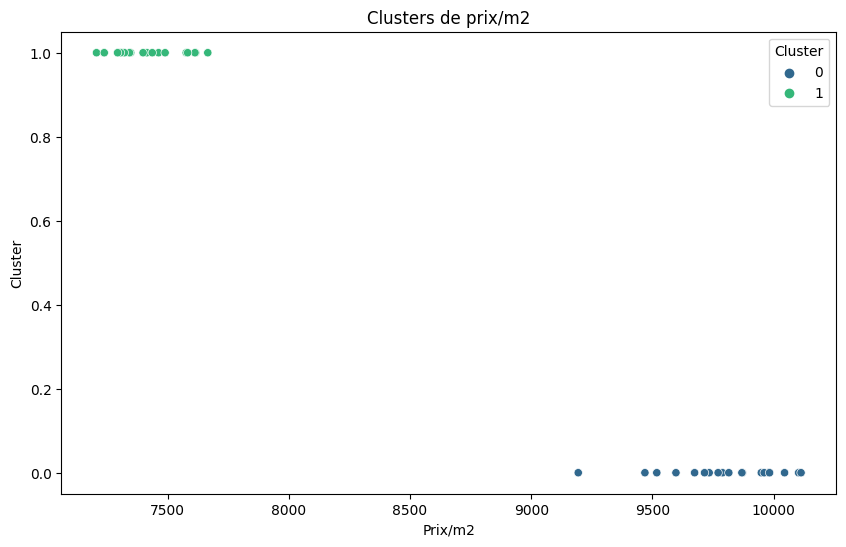

In [49]:
X = df_echant[['prix_m2']]

kmeans = KMeans(n_clusters=2, random_state=50)

kmeans.fit(X)

# Ajouter les labels de cluster au DataFrame original
df_echant['cluster'] = kmeans.labels_

# Visualiser les clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_echant, x='prix_m2', y='cluster', hue='cluster', palette='viridis', legend='full')

plt.title('Clusters de prix/m2')
plt.xlabel('Prix/m2')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

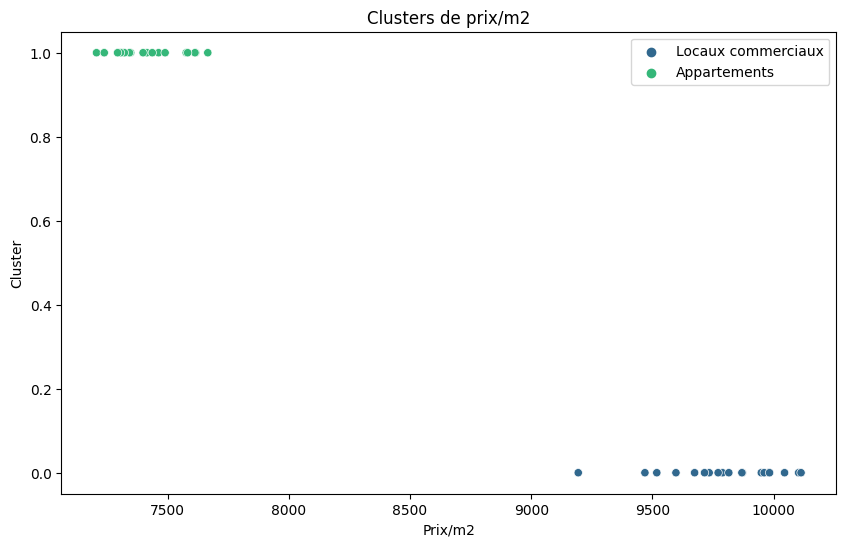

In [50]:
#On affiche les résultats

plt.figure(figsize=(10, 6))

new_nom = {0: 'Locaux commerciaux', 1: 'Appartements'}
df_echant['nom'] = df_echant['cluster'].map(new_nom)

sns.scatterplot(data=df_echant, x='prix_m2', y='cluster', hue='nom', palette='viridis', legend='full')

plt.title('Clusters de prix/m2')
plt.xlabel('Prix/m2')
plt.ylabel('Cluster')
plt.legend(title='')
plt.show()

# Milestone 5 - Analyse et présentation des résultats